**SCC0252 - Visualização Computacional**

João Paulo van Tol Amaral Guerra N°USP: 12557783

Universidade de São Paulo, São Carlos, Brasil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from wordcloud import WordCloud
import requests
from io import BytesIO
import random

# Objetivo

Este trabalho tem como objetivo criar soluções de visualização para uma base que contém dados sobre os 1000 melhores filmes do site IMDb.

O trabalho está dividido em quatro tarefas:

1.   Mostrar o **ranqueamento geral** dos 25 atores mais frequentes e a relação dos filmes destes atores com o público (de acordo com a bilheteria arrecadada) e os críticos especializados (de acordo com avaliações no Meta Score) por meio de **lollipop plot** e **gráfico de barras**;
2.   Mostrar as **similarides** entre os 50 atores mais frequentes por meio de um **mapa de calor** associado a **dendrograma** para **agrupamento hierárquico**;
3.   Mostrar a **distribuição** dos diferentes gêneros de filmes de acordo com o seu ano de lançamento por meio de **ridgeline plot**;
4.   Mostrar o **ranquemento por gênero** dos atores mais frequentes em drama, comédia e ficção cientíca por meio de **wordclouds**.

# Pré-processamento dos dados

In [21]:
data_imdb = pd.read_csv("https://raw.githubusercontent.com/joaovantol/projeto1viscomp/main/imdb_top_1000.csv", header=(0))
data_imdb.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


O primeiro passo é selecionar apenas as colunas que são interessantes para a análise dos dados. Neste caso, seleciona-se as colunas com valores numéricos:


*   Released_Year: ano de lançamento do filme;
*   Runtime: duração do filme em minutos;
*   IMDb_Rating: nota do filme dada pelos usuários do IMDb;
*   Meta_score: nota do filme em um agregador de avaliações da crítica especializada;
*   No_of_Votes: número de avaliações no IMDb;
*   Gross: bilheteria do filme.

Além das colunas com os nomes dos 4 principais atores de cada filme.

In [ ]:
imdb = data_imdb[['Released_Year','Runtime','IMDB_Rating','Meta_score','Star1','Star2','Star3','Star4','No_of_Votes','Gross']]
imdb.head(10)

,Released_Year,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,142 min,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1972,175 min,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2008,152 min,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,1974,202 min,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,1957,96 min,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,2003,201 min,8.9,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,1994,154 min,8.9,94.0,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,1993,195 min,8.9,94.0,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,2010,148 min,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,1999,139 min,8.8,66.0,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


Ao investigar os dados, podemos perceber que há valores faltantes nas colunas 'Meta_score' e 'Gross'. Isto será tratado mais a frente.

In [ ]:
imdb.isna().sum()

Released_Year      0
Runtime            0
IMDB_Rating        0
Meta_score       157
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

É necessário converter a coluna 'Runtime' para o formato int.

In [ ]:
for i in range(imdb.shape[0]):
  imdb['Runtime'][i] = int(imdb['Runtime'][i][:-4])

imdb.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Released_Year,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,142,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1972,175,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2008,152,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,1974,202,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,1957,96,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,2003,201,8.9,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,1994,154,8.9,94.0,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,1993,195,8.9,94.0,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,2010,148,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,1999,139,8.8,66.0,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


A coluna 'Released_Year' tem um problema na instância 966. Seu valor é 'PG'. Investigando, trata-se do filme Apollo 13 que foi lançado em 1995. Corrige-se manualmente para este valor na base de dados.

In [ ]:
data_imdb[966:967]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [ ]:
imdb['Released_Year'][966]='1995'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Após feita a correção para o filme Apollo 13, é feita a conversão dos valores da coluna 'Released_Year' de str para int.

In [ ]:
imdb['Released_Year'] = imdb['Released_Year'].astype(int)
imdb.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Released_Year,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,142,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1972,175,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2008,152,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,1974,202,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,1957,96,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,2003,201,8.9,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,1994,154,8.9,94.0,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,1993,195,8.9,94.0,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,2010,148,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,1999,139,8.8,66.0,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


Também é necessário fazer uma formatação nos valores da coluna 'Gross'.

In [ ]:
for i in range(imdb.shape[0]):
  if type(imdb['Gross'][i]) == str:
    imdb['Gross'][i] = int(imdb['Gross'][i].replace(',',''))

imdb.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Released_Year,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,142,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,1972,175,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,2008,152,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,1974,202,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,1957,96,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
5,2003,201,8.9,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
6,1994,154,8.9,94.0,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
7,1993,195,8.9,94.0,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
8,2010,148,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,1999,139,8.8,66.0,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


Para descobrir os 50 atores mais frequentes na base de dados é feito um melt com as 4 colunas de nomes de atores.

In [ ]:
atores = imdb[['Star1', 'Star2', 'Star3', 'Star4']].melt()
numero_de_atores = 50
top_atores = atores.value.value_counts().nlargest(numero_de_atores)
top_atores

Robert De Niro         17
Tom Hanks              14
Al Pacino              13
Clint Eastwood         12
Brad Pitt              12
Leonardo DiCaprio      11
Matt Damon             11
Christian Bale         11
James Stewart          10
Ethan Hawke             9
Scarlett Johansson      9
Michael Caine           9
Johnny Depp             9
Humphrey Bogart         9
Denzel Washington       9
Aamir Khan              8
Harrison Ford           8
Edward Norton           7
Ian McKellen            7
Robert Downey Jr.       7
Emma Watson             7
Tom Cruise              7
Jake Gyllenhaal         7
Cary Grant              7
Mark Ruffalo            7
Russell Crowe           7
Bruce Willis            7
Toshirô Mifune          7
Morgan Freeman          7
Jeff Bridges            7
Bill Murray             6
Ed Harris               6
Sean Penn               6
William Holden          6
Diane Keaton            6
John Wayne              6
Christopher Plummer     6
Dustin Hoffman          6
Paul Newman 

Agora que já temos os 50 atores mais frequentes, é necessário criar um novo DataFrame com eles e com valores de interesse para cada ator:

*   Média das avaliações do público no IMDb;
*   Média das avaliações da crítica especializada no Meta Score;
*   Média do ano de lançamento dos filmes;
*   Média da duração dos filmes;
*   Total de votos no IMDb;
*   Bilheteria total (em milhões de dólares).

Para os casos das colunas 'Meta_score' e 'Gross' já vimos que há dados faltantes. Como estamos usando a média dos valores da coluna 'Meta_score', podemos apenas desconsiderar os filmes com valores faltantes. Já para a coluna 'Gross', assumimos que os valores faltantes são de filmes com pouca bilheteria e, sendo assim, têm pouca influência na análise geral, podendo também ser ignorados.

In [ ]:
imdb_rating = []
for ator in top_atores.index:
    imdb_rating.append(imdb[(imdb.Star1 == ator) | (imdb.Star2 == ator) | (imdb.Star3 == ator) | (imdb.Star4 == ator)]['IMDB_Rating'])

imdb_rating_medio = []
for i in range(len(imdb_rating)):
    imdb_rating_ator = []
    for j in range(len(imdb_rating[i])):
      valor = imdb_rating[i].values[j]
      imdb_rating_ator.append(valor)
    imdb_rating_medio.append(round(sum(imdb_rating_ator)/len(imdb_rating_ator),2))

In [ ]:
imdb_meta = imdb.dropna(subset=['Meta_score'])

meta_score = []
for ator in top_atores.index:
    meta_score.append(imdb_meta[(imdb_meta.Star1 == ator) | (imdb_meta.Star2 == ator) | (imdb_meta.Star3 == ator) | (imdb_meta.Star4 == ator)]['Meta_score'])

meta_score_medio = []
for i in range(len(meta_score)):
    meta_score_ator = []
    for j in range(len(meta_score[i])):
      valor = meta_score[i].values[j]
      meta_score_ator.append(valor)
    meta_score_medio.append(round(sum(meta_score_ator)/len(meta_score_ator)/10,2))

In [ ]:
ano = []
for ator in top_atores.index:
    ano.append(imdb[(imdb.Star1 == ator) | (imdb.Star2 == ator) | (imdb.Star3 == ator) | (imdb.Star4 == ator)]['Released_Year'])

ano_medio = []
for i in range(len(ano)):
    ano_ator = []
    for j in range(len(ano[i])):
      valor = ano[i].values[j]
      ano_ator.append(valor)
    ano_medio.append(round(sum(ano_ator)/len(ano_ator),1))

In [ ]:
duracao = []
for ator in top_atores.index:
    duracao.append(imdb[(imdb.Star1 == ator) | (imdb.Star2 == ator) | (imdb.Star3 == ator) | (imdb.Star4 == ator)]['Runtime'])

duracao_media = []
for i in range(len(duracao)):
    duracao_ator = []
    for j in range(len(duracao[i])):
      valor = duracao[i].values[j]
      duracao_ator.append(valor)
    duracao_media.append(round(sum(duracao_ator)/len(duracao_ator),1))

In [ ]:
votos = []
for ator in top_atores.index:
    votos.append(imdb[(imdb.Star1 == ator) | (imdb.Star2 == ator) | (imdb.Star3 == ator) | (imdb.Star4 == ator)]['No_of_Votes'])

votos_totais = []
for i in range(len(votos)):
    votos_ator = []
    for j in range(len(votos[i])):
      valor = votos[i].values[j]
      votos_ator.append(valor)
    votos_totais.append(sum(votos_ator))

In [ ]:
bilheteria = []
for ator in top_atores.index:
    bilheteria.append(imdb[(imdb.Star1 == ator) | (imdb.Star2 == ator) | (imdb.Star3 == ator) | (imdb.Star4 == ator)]['Gross'])

bilheteria_total = []
for i in range(len(bilheteria)):
    bilheteria_ator = []
    for j in range(len(bilheteria[i])):
      if type(bilheteria[i].values[j]) == int:
        valor = bilheteria[i].values[j]
        bilheteria_ator.append(valor)
    bilheteria_total.append(round(sum(bilheteria_ator)/1000000,1))

In [ ]:
data = {'Nº de filmes': top_atores,
        'Nota (público)': imdb_rating_medio,
        'Nota (críticos)': meta_score_medio,
        'Ano': ano_medio,
        'Duração': duracao_media,
        'Nº de votos': votos_totais,
        'Bilheteria': bilheteria_total}
df_top = pd.DataFrame(data=data)
df_top

,Nº de filmes,Nota (público),Nota (críticos),Ano,Duração,Nº de votos,Bilheteria
Robert De Niro,17,8.12,7.94,1991.5,150.2,7787234,1001.7
Tom Hanks,14,8.04,7.99,2002.4,129.9,9374159,2903.6
Al Pacino,13,8.08,7.88,1988.8,155.9,6098413,641.2
Clint Eastwood,12,7.96,7.41,1979.8,129.7,3352846,568.9
Brad Pitt,12,8.02,7.24,2005.1,136.6,9144728,1050.2
Leonardo DiCaprio,11,8.13,7.49,2007.5,154.1,10782195,2049.3
Matt Damon,11,8.01,7.94,2006.1,128.3,6840383,1728.5
Christian Bale,11,8.05,7.29,2006.6,132.8,8565922,1616.4
James Stewart,10,8.14,9.07,1949.6,117.8,1724290,61.7
Ethan Hawke,9,7.89,7.98,2002.1,114.7,2436965,256.7


# Tarefa 1: Ranqueamento geral (lollipop plot e gráfico de barras)

A primeira tarefa consiste em fazer lollipop plot/gráficos de barras lado a lado para ranquear os 25 atores mais frequentes na base dos 1000 melhores filmes do IMDb e comparar quanto estes atores geraram em bilheteria e qual a nota que os críticos deram para seus filmes.

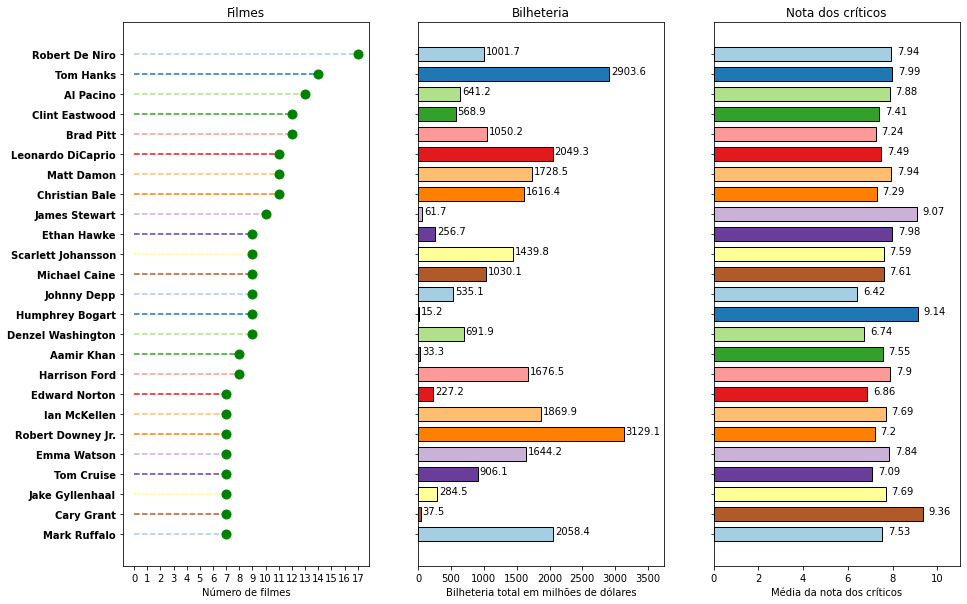

In [ ]:
n_de_atores = 25
top_atores_fig = top_atores[0:n_de_atores]
bilheteria_fig = bilheteria_total[0:n_de_atores]
meta_score_fig = meta_score_medio[0:n_de_atores]

fig, ax = plt.subplots(1, 3, figsize=(15,10), sharey=True)

color = sns.color_palette("Paired", n_de_atores)

ax[0].hlines(y=top_atores_fig.index , xmin=0, xmax=top_atores_fig.values, color=color, linestyles='dashed')
ax[0].plot(top_atores_fig.values, top_atores_fig.index, 'go', markersize=9)
ax[0].set_xlabel('Número de filmes')
ax[0].set_xticks(np.arange(top_atores_fig.values.max()+1))
ax[0].set_yticklabels(top_atores_fig.index, fontweight='semibold')
ax[0].set_title('Filmes')

ax[1].barh(y=top_atores_fig.index, width=bilheteria_fig, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_atores_fig.index, bilheteria_fig):
    ax[1].text(val+30, name, round(val,1))
ax[1].set_xlim(0,3750)
ax[1].set_xlabel("Bilheteria total em milhões de dólares")
ax[1].set_title('Bilheteria')

ax[2].barh(y=top_atores_fig.index, width=meta_score_fig, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_atores_fig.index, meta_score_fig):
    ax[2].text(val+0.25, name, round(val,2))
ax[2].set_xlim(0,11)
ax[2].set_xlabel("Média da nota dos críticos")
ax[2].set_title('Nota dos críticos')

plt.gca().invert_yaxis()
plt.show()

Para o gráfico mais à esquerda foi feito um lollipop plot, uma vez que os atores estão ordenados em ordem decrescente de cima para baixo em relação ao número de filmes em que eles atuaram. Neste caso, o lollipop plot é visualmente mais agradável.

Entretanto, para o gráfico central e o mais à direita, como não há ordenação entre os valores, o lollipop plot ficaria um pouco confuso e menos apropriado. Nestes dois casos, o gráfico de barras deixa a informação desordenada mais fácil de ser interpretada.

Além disso, foi escolhida uma paleta de cores pareadas. Mesmo com muitas categorias (25 atores), esta escolha facilita ao observador associar cada ator a uma altura específica da figura.

Algumas conclusões podem ser tiradas a partir da visualização gerada: 
*   Percebe-se que não há correlação entre o número de filmes em que um ator participa e a bilheteria total que estes filmes geram. Por exemplo, Robert De Niro é o ator com maior número de filmes (17), mas sua bilheteria soma apenas 1 bilhão de dólares, enquanto Robert Downey Jr. participa em apenas 7 filmes e soma mais do que o triplo em bilheteria;
*   Há alguns atores com uma bilheteria irrisória, mas com avaliações excelentes por parte dos críticos, e.g. James Stewart, Humphrey Bogart e Cary Grant.

#Tarefa 2: Similaridades e agrupamento hierárquico (mapa de calor com dendrograma)

A segunda tarefa consiste em fazer um mapa de calor para buscar similaridades entre os 50 atores mais frequentes nos 1000 melhores filmes do IMDb e estabelecer agrupamentos hierárquicos por meio de dendrograma.

Esta tarefa foi pensada a partir da visualização da Tarefa 1, em que aparentemente filmes clássicos (e.g. estrelados por James Stewart ou Humphrey Bogart) são melhor avaliados pelos críticos do que os filmes de atores contemporâneos. Então ampliamos o número de atores mais frequentes para 50 e incluímos outras variáveis além de bilheteria e avaliação dos críticos.

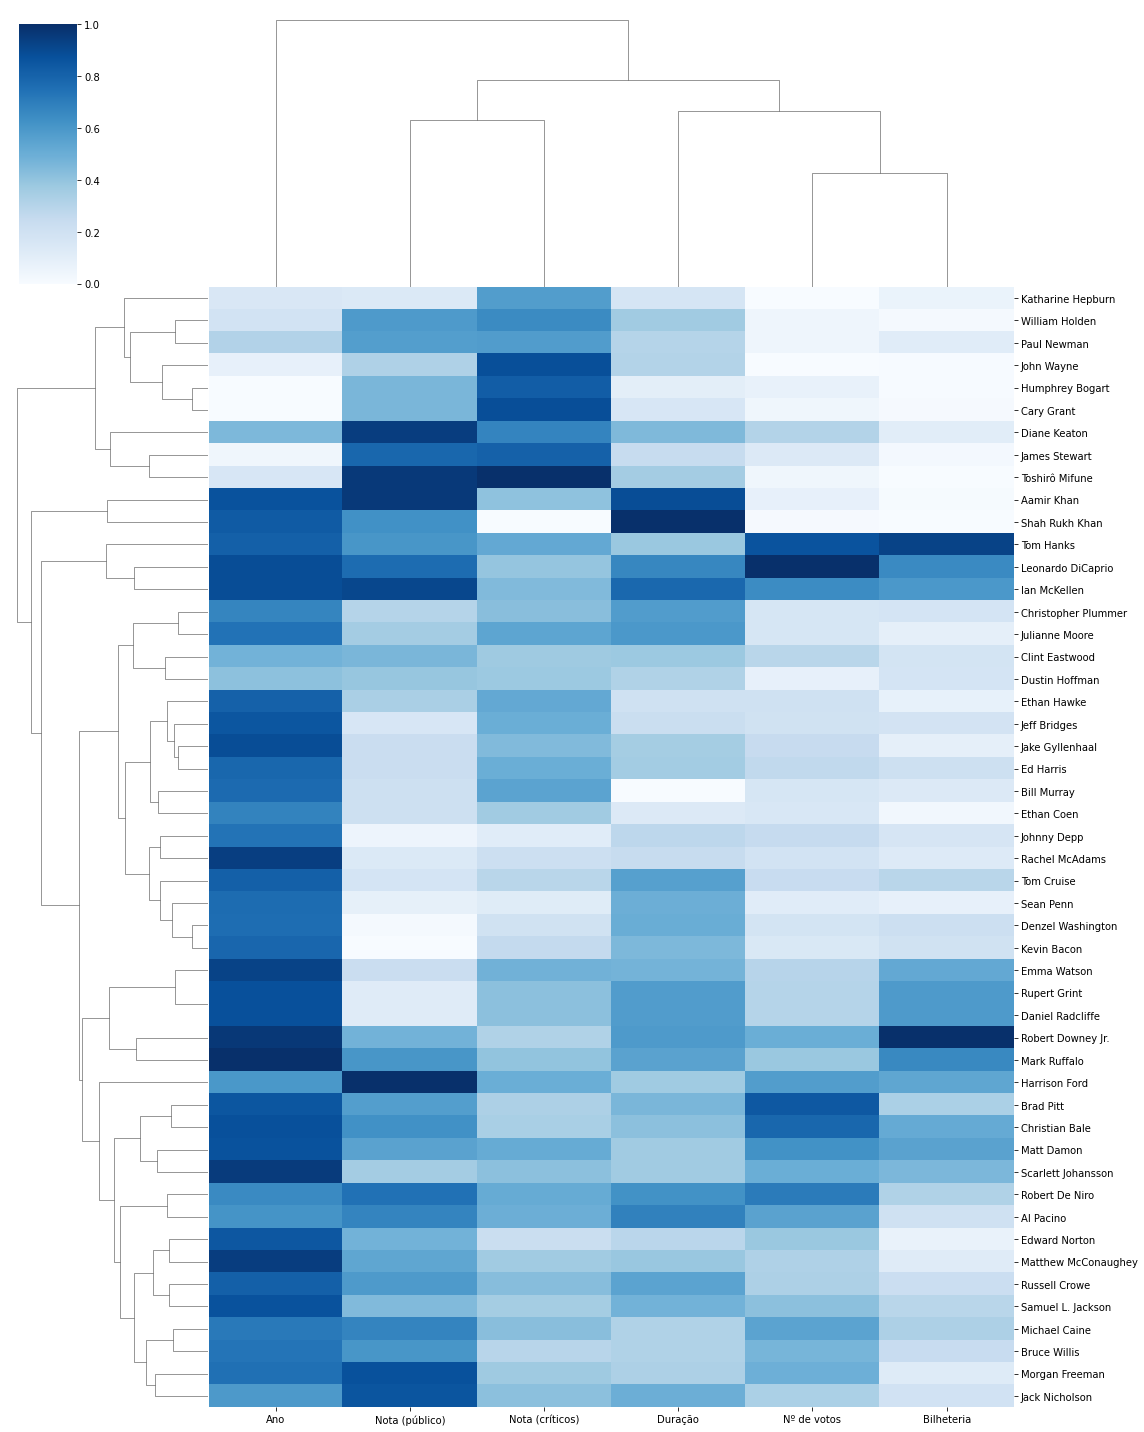

In [ ]:
sns.clustermap(df_top[df_top.columns[1:df_top.shape[1]]], standard_scale=1, figsize=(16,20), cmap='Blues')
plt.show()

Para fazer a figura, os dados passaram por um escalonamento MinMax e foi escolhida uma escala de cores com matiz azul com luminosidade (lightness) mais intensa para os maiores valores.

O mapa de calor mostra claramente dois grupos de atores:


*   Um grupo na parte superior da figura com atores de filmes clássicos como James Stewart, William Holden e Toshirô Mifune com excelentes avaliações tanto do público quanto dos críticos, mas com pouca bilheteria arrecadada e poucos votos no IMDb;

*   Um segundo grupo aparece mais abaixo na figura e é mais heterogêneo. É composto em geral por atores de filmes mais recentes com avaliações mais variadas, mas no geral com maiores bilheterias e mais votos no IMDb;

*   Como um detalhe, observa-se dentro deste segundo grupo um subgrupo composto por atores indianos com filmes de durações bastante extensas.



# Tarefa 3: Distribuição dos diferentes gêneros por ano (ridgeline plot)

A Tarefa 3 consiste em visualizar como é a distribuição dos gêneros ao longo dos anos. O ridgeline plot é muito útil neste caso, pois há 21 categorias de gênero. O uso de gráficos de distribuição mais comuns como boxplots, histogramas ou de densidade usaria muito espaço.

A partir da Tarefa 2 ficou claro que o ano de lançamento de um filme é uma variável importante para a formação de grupos, portanto o ridgeline plot pode fornecer mais informações sobre uma eventual moda em anos mais antigos para algum gênero de filme.

In [ ]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from joypy import joyplot

Como há muitos filmes com mais de um gênero atribuído a ele, é necessário tratar a base de dados original para fazer a contagem de quantas vezes cada gênero aparece na base.

In [ ]:
imdb_genre_ano = data_imdb[['Genre','Released_Year']]
imdb_genre_ano['Released_Year'][966]='1995'
imdb_genre_ano['Released_Year'] = imdb_genre_ano['Released_Year'].astype(int)

imdb_genre_ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,Released_Year
0,Drama,1994
1,"Crime, Drama",1972
2,"Action, Crime, Drama",2008
3,"Crime, Drama",1974
4,"Crime, Drama",1957
...,...,...
995,"Comedy, Drama, Romance",1961
996,"Drama, Western",1956
997,"Drama, Romance, War",1953
998,"Drama, War",1944


In [ ]:
for i in range(1000):
  if ',' in imdb_genre_ano['Genre'][i]:
    new_genre = imdb_genre_ano['Genre'][i][0:imdb_genre_ano['Genre'][i].find(',')]
    new_year = int(imdb_genre_ano['Released_Year'][i])
    imdb_genre_ano = imdb_genre_ano.append({'Genre':new_genre, 'Released_Year':new_year},ignore_index=True)
    imdb_genre_ano['Genre'][i] = imdb_genre_ano['Genre'][i][imdb_genre_ano['Genre'][i].find(',')+2:]
    if ',' in imdb_genre_ano['Genre'][i]:
      new_genre = imdb_genre_ano['Genre'][i][0:imdb_genre_ano['Genre'][i].find(',')]
      new_year = int(imdb_genre_ano['Released_Year'][i])
      imdb_genre_ano = imdb_genre_ano.append({'Genre':new_genre, 'Released_Year':new_year},ignore_index=True)
      imdb_genre_ano['Genre'][i] = imdb_genre_ano['Genre'][i][imdb_genre_ano['Genre'][i].find(',')+2:]
    
imdb_genre_ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Genre,Released_Year
0,Drama,1994
1,Drama,1972
2,Drama,2008
3,Drama,1974
4,Drama,1957
...,...,...
2536,Drama,1953
2537,Romance,1953
2538,Drama,1944
2539,Crime,1935


Há 2541 contagens simples de gênero. O comando abaixo faz o ridgeline plot baseando-se na contagem total de cada gênero.

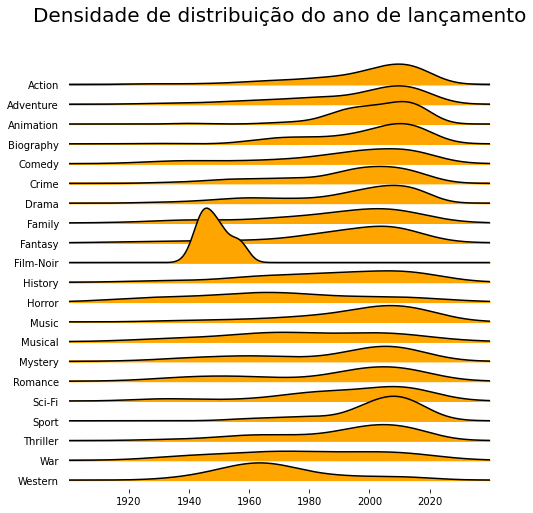

In [ ]:
from matplotlib import cm

joyplot(imdb_genre_ano, by = 'Genre', column = 'Released_Year', color = 'Orange',
        fade = False, figsize = (7,7))
plt.title("Densidade de distribuição do ano de lançamento", fontsize=20)
plt.show()

Nota-se que a maioria dos gêneros tem moda por volta dos anos 2010, fato que está de acordo com o maior grupo do mapa de calor. Duas exceções são bastante claras: film-noir é mais frequente entre os anos 1940 e 1950 e western tem moda perto de 1960. Além disso, os gêneros de história, horror, musical e guerra têm as distribuições mais platicúrticas, indicando que os melhores filmes destes 4 gêneros são bem variados em termos de ano de lançamento.

Também evidencia-se que alguns gêneros podem contribuir bastante para o grupo menor do mapa de calor, apesar de centrados em 2010. São gêneros que possuem uma cauda pesada à esquerda: comédia, crime, drama, mistério e romance.

# Tarefa 4: Ranqueamento por gênero (wordcloud)

A Tarefa 4 é de ranqueamento dos atores mais frequentes de acordo com os gêneros dos filmes. Para isto foram criadas visualizações baseadas em wordclouds. Esta escolha de visualização foi puramente estética. Não há uma vantagem clara em mostrar os dados desta forma ao invés de fazer gráficos de barra ou lollipop plots. Entretanto, há um fator lúdico que pode ser criado tanto na arte de fundo quanto no incentivo para que o observador descubra nomes inesperados entre os atores menos frequentes.

Primeiramente, é necessário criar "dicionários" para contabilizar as frequências dos atores em cada gênero. Serão feitos wordclouds apenas para três gêneros: drama, comédia e ficção científica.

In [3]:
imdb_genre = data_imdb[['Genre','Star1','Star2','Star3','Star4']]
imdb_genre.head(10)

,Genre,Star1,Star2,Star3,Star4
0,Drama,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,"Crime, Drama",Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,"Action, Crime, Drama",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,"Crime, Drama",Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,"Crime, Drama",Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
5,"Action, Adventure, Drama",Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
6,"Crime, Drama",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
7,"Biography, Drama, History",Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall
8,"Action, Adventure, Sci-Fi",Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
9,Drama,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier


In [4]:
for i in range(imdb_genre.shape[0]):
  imdb_genre['Genre'][i] = imdb_genre['Genre'][i].replace(',','').split()

imdb_genre.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genre,Star1,Star2,Star3,Star4
0,[Drama],Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,"[Crime, Drama]",Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,"[Action, Crime, Drama]",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,"[Crime, Drama]",Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,"[Crime, Drama]",Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
5,"[Action, Adventure, Drama]",Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
6,"[Crime, Drama]",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
7,"[Biography, Drama, History]",Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall
8,"[Action, Adventure, Sci-Fi]",Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
9,[Drama],Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier


In [5]:
atores_drama = []
for i in range(imdb_genre.shape[0]):
  for j in range(len(imdb_genre['Genre'][i])):
    if imdb_genre['Genre'][i][j] == 'Drama':
      atores_drama.append(imdb_genre['Star1'][i])
      atores_drama.append(imdb_genre['Star2'][i])
      atores_drama.append(imdb_genre['Star3'][i])
      atores_drama.append(imdb_genre['Star4'][i])     
for i in range(len(atores_drama)):
  atores_drama[i] = atores_drama[i].replace(" ","").replace(".","")

atores_drama_str = " ".join(s for s in atores_drama)

atores_comedia = []
for i in range(imdb_genre.shape[0]):
  for j in range(len(imdb_genre['Genre'][i])):
    if imdb_genre['Genre'][i][j] == 'Comedy':
      atores_comedia.append(imdb_genre['Star1'][i])
      atores_comedia.append(imdb_genre['Star2'][i])
      atores_comedia.append(imdb_genre['Star3'][i])
      atores_comedia.append(imdb_genre['Star4'][i])
for i in range(len(atores_comedia)):
  atores_comedia[i] = atores_comedia[i].replace(" ","").replace(".","")

atores_comedia_str = " ".join(s for s in atores_comedia)

atores_scifi = []
for i in range(imdb_genre.shape[0]):
  for j in range(len(imdb_genre['Genre'][i])):
    if imdb_genre['Genre'][i][j] == 'Sci-Fi':
      atores_scifi.append(imdb_genre['Star1'][i])
      atores_scifi.append(imdb_genre['Star2'][i])
      atores_scifi.append(imdb_genre['Star3'][i])
      atores_scifi.append(imdb_genre['Star4'][i])
for i in range(len(atores_scifi)):
  atores_scifi[i] = atores_scifi[i].replace(" ","").replace(".","")

atores_scifi_str = " ".join(s for s in atores_scifi)

In [6]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

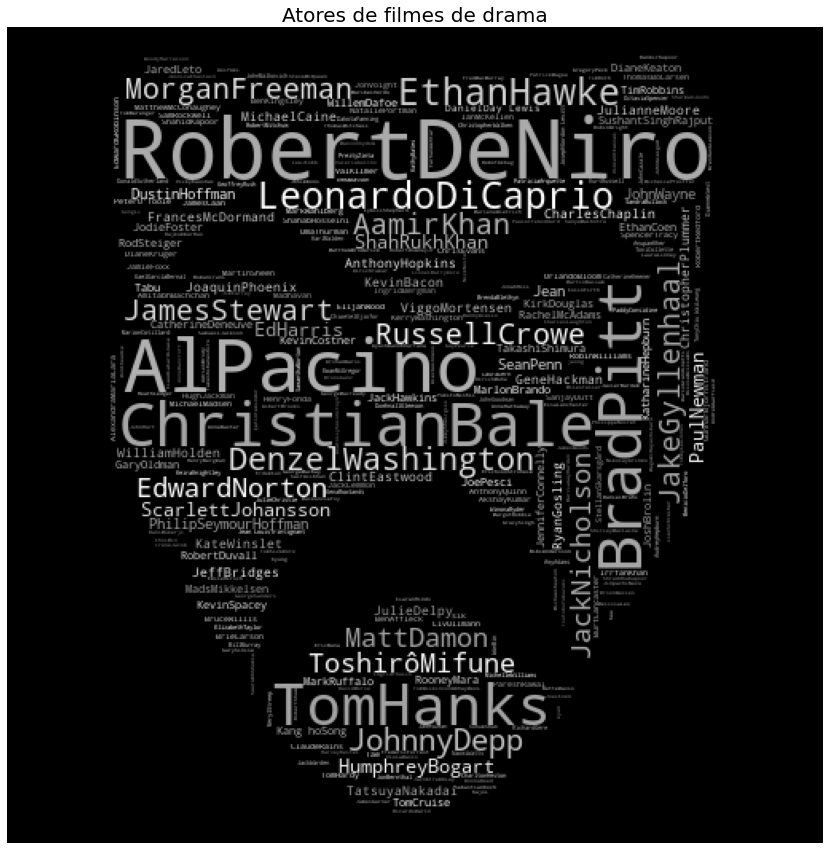

In [15]:
response_drama = requests.get("https://raw.githubusercontent.com/joaovantol/projeto1viscomp/main/drama.png")
drama_img = Image.open(BytesIO(response_drama.content))
drama_mask = np.array(drama_img)

wordcloud = WordCloud(background_color="black",
                      width=1000, height=1000, max_words=300,
                      mask=drama_mask, max_font_size=150,
                      min_font_size=2).generate(atores_drama_str)

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
ax.set_axis_off()
plt.title("Atores de filmes de drama", fontsize=20)
plt.imshow(wordcloud);

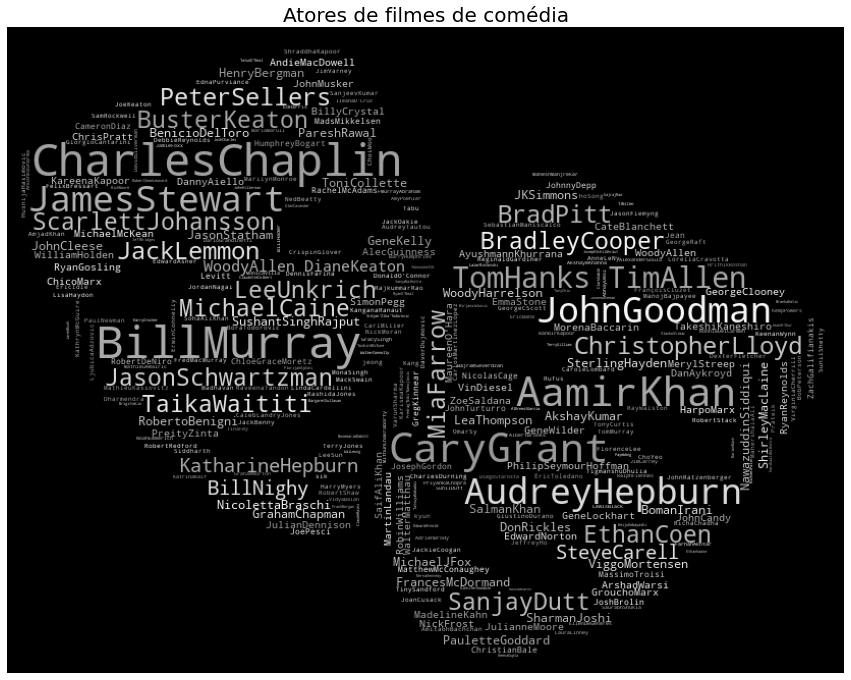

In [19]:
response_comedia = requests.get("https://raw.githubusercontent.com/joaovantol/projeto1viscomp/main/comedia.jpg")
comedia_img = Image.open(BytesIO(response_comedia.content))
comedia_mask = np.array(comedia_img)

wordcloud = WordCloud(background_color="black",
                      width=1000, height=1000, max_words=300,
                      mask=comedia_mask, max_font_size=150,
                      min_font_size=2).generate(atores_comedia_str)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
ax.set_axis_off()
plt.title("Atores de filmes de comédia", fontsize=20)
plt.imshow(wordcloud);

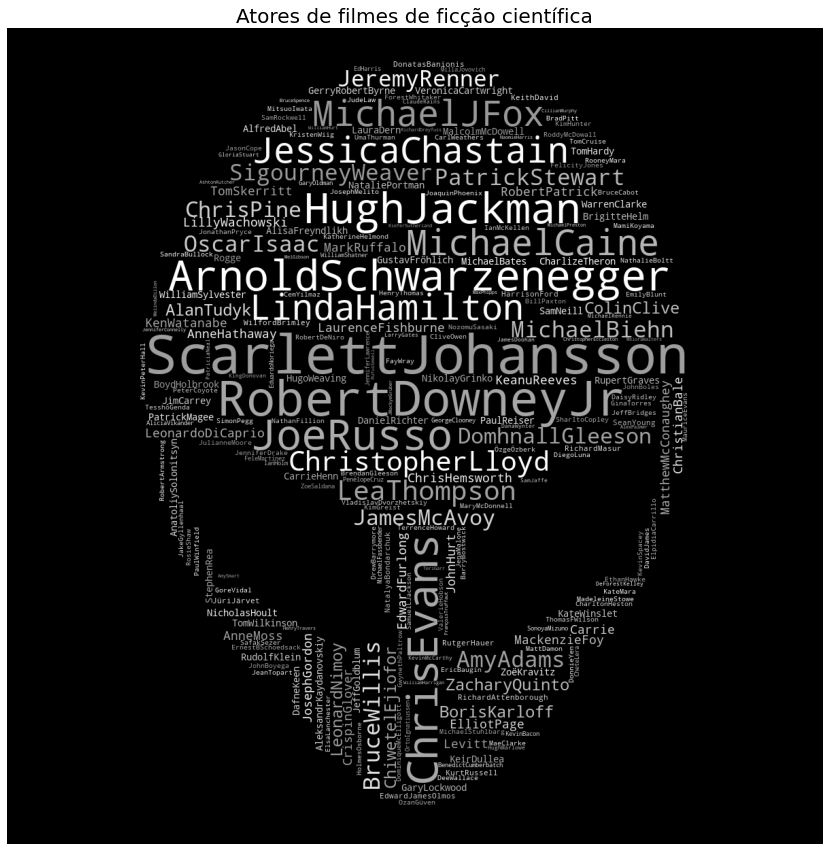

In [20]:
response_scifi = requests.get("https://raw.githubusercontent.com/joaovantol/projeto1viscomp/main/scifi.jpg")
scifi_img = Image.open(BytesIO(response_scifi.content))
scifi_mask = np.array(scifi_img)

wordcloud = WordCloud(background_color="black",
                      width=1000, height=1000, max_words=300,
                      mask=scifi_mask, max_font_size=150,
                      min_font_size=2).generate(atores_scifi_str)

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
ax.set_axis_off()
plt.title("Atores de filmes de ficção científica", fontsize=20)
plt.imshow(wordcloud);